In [72]:
# import libraries
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
import keras
from sklearn.datasets import make_moons
np.random.seed(124)

x_train, y_train = make_moons(500, noise=0.20)
x_test, y_test = make_moons(100, noise=0.20)

In [383]:
class NN:
    def __init__(self, structure = [2,5,5,1]):
        self.weights = []
        self.input_num = structure[0]
        for i, j in zip(structure[1:], structure[0:-1]):
            self.weights.append(np.random.random_sample(size = (i,j)))
        self.structure = structure
        pass
    
    def reg(self, x, w):
        return np.dot(w, x.T)
    
    def sig(self, a):
        return 1 / (1 + np.exp(-a))
    
    def sig_deriv(self, a):
        temp = self.sig(a) * (1 - self.sig(a))
        return temp.reshape(temp.shape[0],1)

    def fp(self, x):
        x = np.array(x)
        self.output, self.output_raw = [x], [x]
        for layer in range(len(self.structure) - 1):
            self.output_raw.append(self.reg(x, self.weights[layer]))
            x = self.sig(self.reg(x, self.weights[layer]))
            self.output.append(x)
        return self
    
    def bp(self, y):
        y = np.array(y)
        errors, self.delta = [], []
        weights = [np.sum(i, axis = 1) for i in self.weights]
        for idx, layer in enumerate(reversed(range(1,len(self.structure)))):
            errors.append([self.output[-1] - y] if idx == 0 else np.dot(self.weights[layer].T, delta))
            delta = np.array(errors[idx] * self.sig_deriv(self.output_raw[layer]))
            self.delta.append(delta)
        self.delta.reverse()
        self.deriv = [np.dot(j, np.array([i])) for i, j in zip(self.output_raw, self.delta)]
        return self
    
    def fit(self, X, y, lr = 0.02, epoch = 1000):
        self.error = []
        for _ in range(epoch):
            length = len(y)
            indexes = np.random.choice(np.arange(0, length), size = length, replace = False)
            for i in indexes:
                self.fp(X[i]).bp(y[i])
                self.weights = [(weight - lr * deriv) for weight, deriv in zip(self.weights, self.deriv)]
            prediction = []
            for row in X:
                prediction.append(self.fp(row).output[-1])
            self.error.append(0.5*sum(np.square(y - np.array(prediction).T[0]))/len(y))
        return self
    
    def predict_proba(self, x):
        prediction = []
        for row in x:
            prediction.append(self.fp(row).output[-1])
        return np.array(prediction).reshape(len(x),)
    
    def predict(self, x):
        return self.predict_proba(x) > 0.5

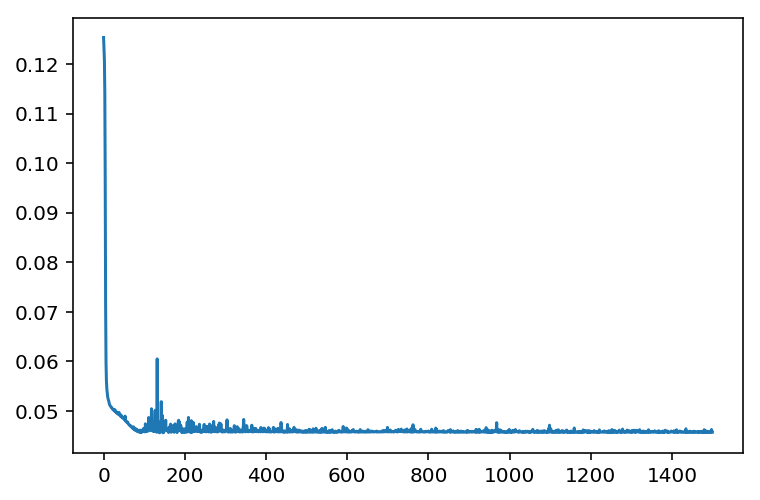

In [384]:
epoch = 1500
n = NN()
plt.plot(np.arange(epoch), n.fit(x_train, y_train, lr = 0.05, epoch = epoch).error)

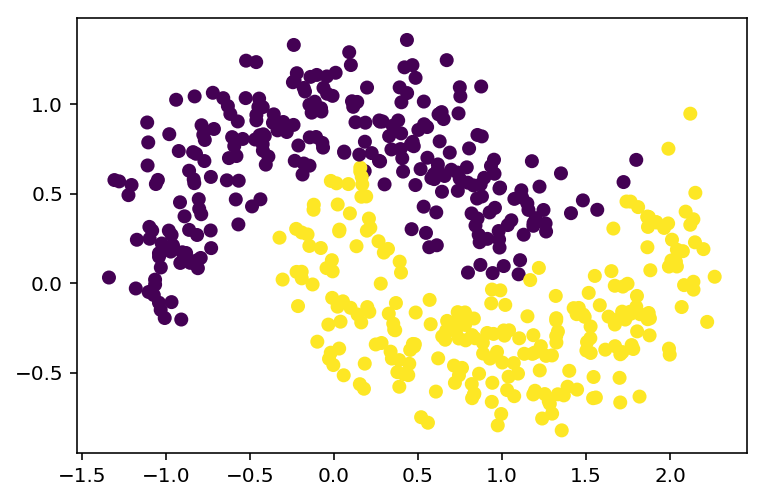

In [382]:
plt.scatter(x_train.T[0], x_train.T[1], c = n.predict(x_train))

In [348]:
np.arange(1).reshape(1,-1)

array([[0]])